In [1]:
%pylab inline
#import matplotlib as mpl
#mpl.rcParams['mathtext.default'] = 'rm'

Populating the interactive namespace from numpy and matplotlib


In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import scipy

In [223]:
im = np.array(Image.open('./galaxy_pic.jpeg'))

print(im.shape)

im_grey = np.array(Image.open('galaxy_pic.jpeg').convert('L'))

#print(im_grey.shape)

im_grey_to_save = Image.fromarray(im_grey)
im_grey_to_save.save('./galaxy_grey.jpeg')

print(len(im[0]))
print(len(im[:,0]))
print(np.max(im))

(620, 1280, 3)
1280
620
255


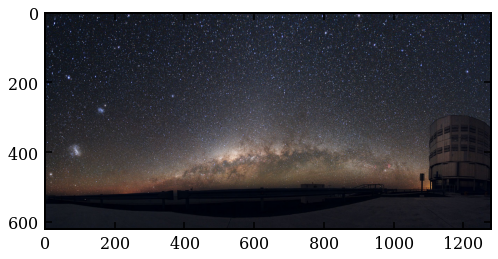

In [15]:
plt.figure(figsize=(8,8))
plt.imshow(im)

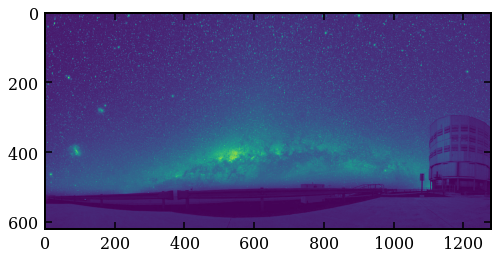

In [16]:
plt.figure(figsize=(8,8))
plt.imshow(im_grey)



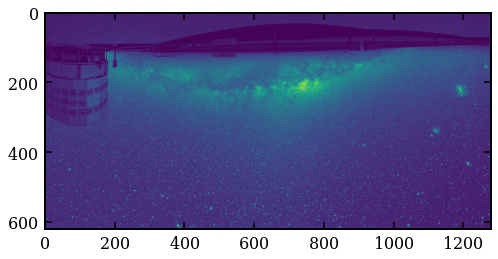

In [68]:
plt.figure(figsize=(8,8))
im_grey_rot = np.rot90(np.rot90(im_grey))
plt.imshow(im_grey_rot)

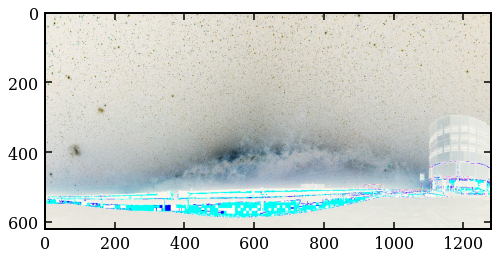

In [20]:
im_neg = -im
plt.figure(figsize=(8,8))
plt.imshow(im_neg)

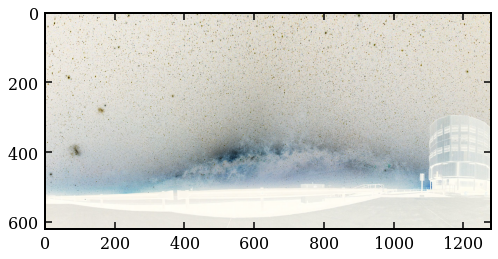

In [29]:
im_neg = 255-im
plt.figure(figsize=(8,8))
plt.imshow(im_neg)

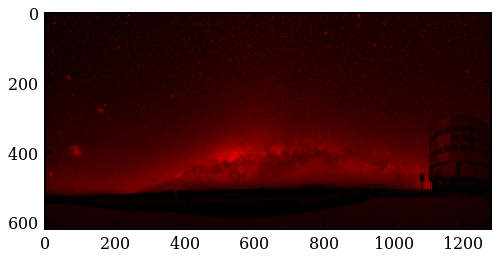

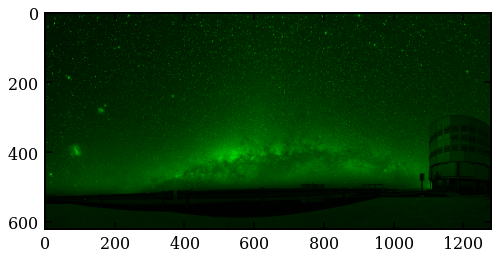

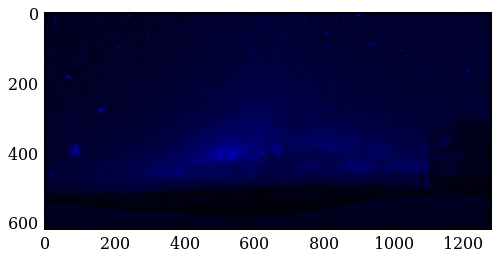

In [46]:
im_r, im_g, im_b = im.copy(),im.copy(),im.copy()
im_r[:,:,1] = 0
im_r[:,:,2] = 0

im_g[:,:,0] = 0
im_g[:,:,2] = 0

im_b[:,:,0] = 0
im_b[:,:,1] = 0

plt.figure(figsize=(8,8))
plt.imshow(im_r)
plt.show()

plt.figure(figsize=(8,8))
plt.imshow(im_g)
plt.show()

plt.figure(figsize=(8,8))
plt.imshow(im_b)
plt.show()

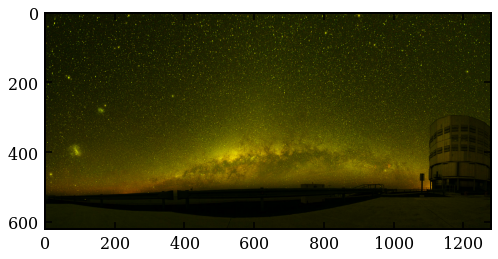

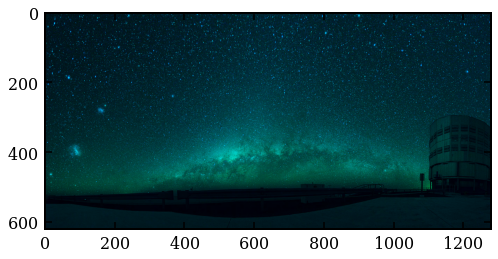

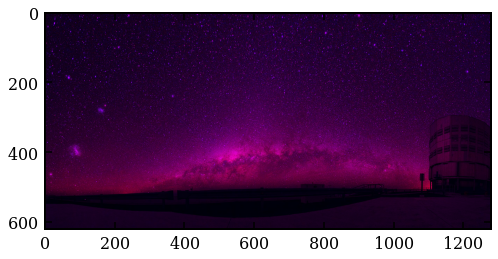

In [48]:
im_y, im_c, im_m = im.copy(),im.copy(),im.copy()
im_c[:,:,0] = 0

im_m[:,:,1] = 0

im_y[:,:,2] = 0

plt.figure(figsize=(8,8))
plt.imshow(im_y)
plt.show()

plt.figure(figsize=(8,8))
plt.imshow(im_c)
plt.show()

plt.figure(figsize=(8,8))
plt.imshow(im_m)
plt.show()

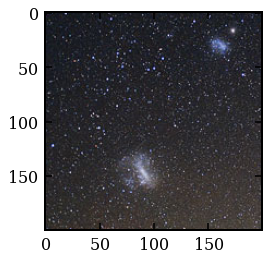

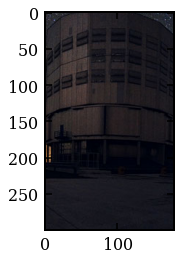

In [56]:
#lets just look at the magellanic clouds
#print(im.shape)
im_mc = im[250:450,0:200,:]
plt.imshow(im_mc)
plt.show()

#Now lets look at the observatory

im_obs = im[300:600,1100:-1,:]
plt.imshow(im_obs)
plt.show()

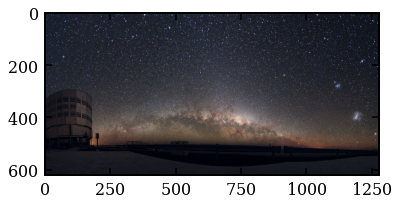

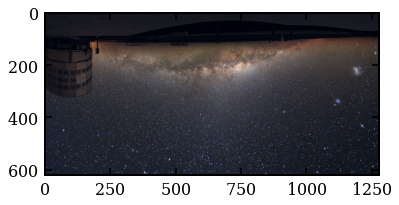

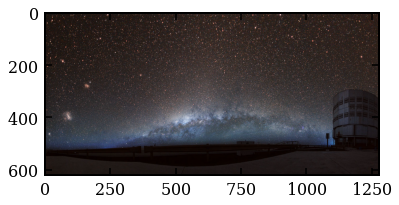

In [61]:
im_flip = im[:,::-1,:]
plt.imshow(im_flip)
plt.show()

im_flip = im[::-1,::-1,:]
plt.imshow(im_flip)
plt.show()

#What if i flip the rgb values, what would that even be?
#if its (R,G,B) then flipping would do B, G R so it exchanges the blues and reds?
im_flip = im[:,:,::-1]
plt.imshow(im_flip)
plt.show()

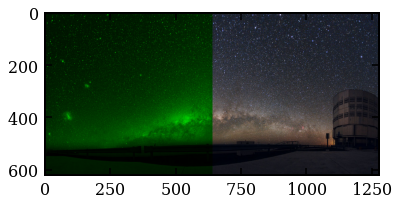

In [64]:
#lets say I want to take the lefthand side of the image and make it Green
#

left_im = im.copy()

left_im[:,0:int(1280/2),0] = 0
left_im[:,0:int(1280/2),2] = 0

plt.imshow(left_im)

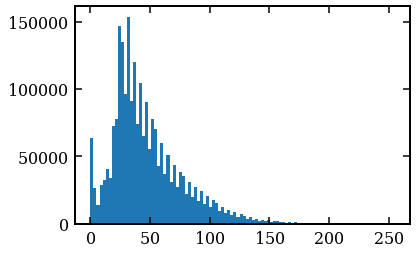

[11 20 25 ... 19 19 29]


In [67]:
im_flat = im.flatten()

plt.hist(im_flat,bins=100)
plt.show()

print(im_flat)

255


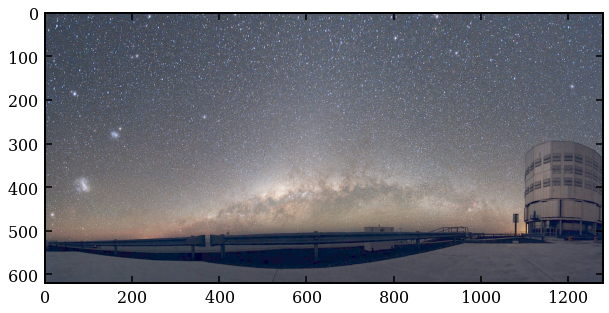

In [104]:
print(np.max(im))

plt.figure(1,(10,10))

im_bright = Image.fromarray(np.uint8(255.0*(im / 255.0)**0.5))

plt.imshow(im_bright)
plt.show()

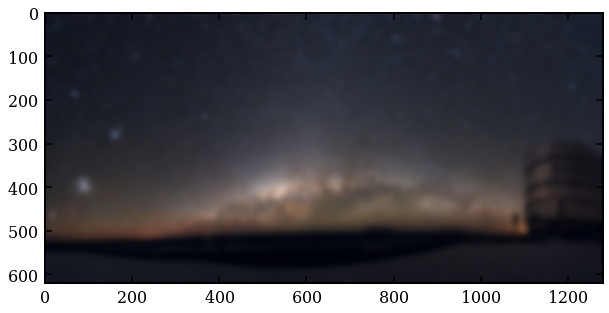

In [130]:
from scipy.ndimage.filters import gaussian_filter

plt.figure(1,(10,10))

im_r, im_g, im_b = im[:,:,0], im[:,:,1], im[:,:,2]

blur_r = gaussian_filter(im_r,sigma=7)
blur_g = gaussian_filter(im_g,sigma=7)
blur_b = gaussian_filter(im_b,sigma=7)

colored_blurred = np.dstack((blur_r,blur_g,blur_b))

plt.figure(1,(10,10))
plt.imshow(colored_blurred)
plt.show()

[11 22 67 ... 17 19 19]


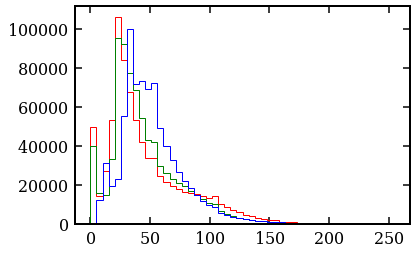

In [138]:
print(np.ndarray.flatten(im_r))

plt.hist(np.ndarray.flatten(im_r),bins=50,color='r',histtype='step')
plt.hist(np.ndarray.flatten(im_g),bins=50,color='g',histtype='step')
plt.hist(np.ndarray.flatten(im_b),bins=50,color='b',histtype='step')
plt.show()

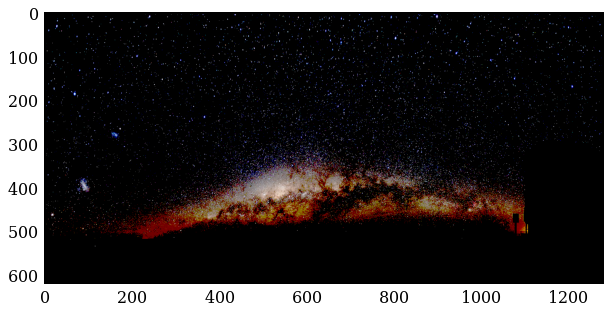

In [144]:
im_high = im.copy()
im_high[im_high<100]=0

plt.figure(1,(10,10))
plt.imshow(im_high)
plt.show()

(620, 1280)


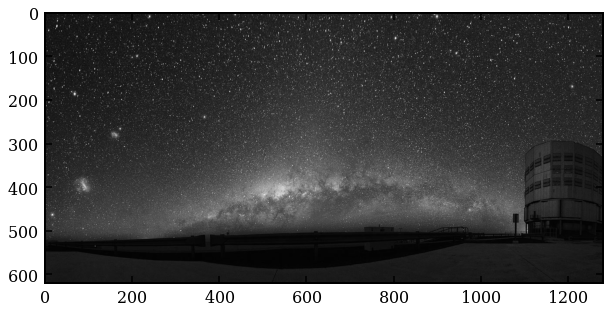

In [152]:
im_avg = im.copy()

im_avg = np.mean(im,axis=2)
print(im_avg.shape)

plt.figure(1,(10,10))
plt.imshow(im_avg,cmap='binary_r')
plt.show()

In [162]:
x_choosen, y_choosen = 200, 300 

square_bin_segment = im[y_choosen-5:y_choosen+5,x_choosen-5:x_choosen+5,:]
#print(square_bin_segment)

avg_r = np.mean(square_bin_segment[:,:,0])
avg_g = np.mean(square_bin_segment[:,:,1])
avg_b = np.mean(square_bin_segment[:,:,2])

print(avg_r)
print(avg_g)
print(avg_b)



for x_choosen in arange(5,im.shape[1]-5):
    for y_choosen in arange(5,im.shape[0]-5):
        square_bin_segment = im[y_choosen-5:y_choosen+5,x_choosen-5:x_choosen+5,:]
        avg_r = np.mean(square_bin_segment[:,:,0])
        avg_g = np.mean(square_bin_segment[:,:,1])
        avg_b = np.mean(square_bin_segment[:,:,2])


39.29
39.39
48.58


[   0    1    2 ... 1277 1278 1279]
31397


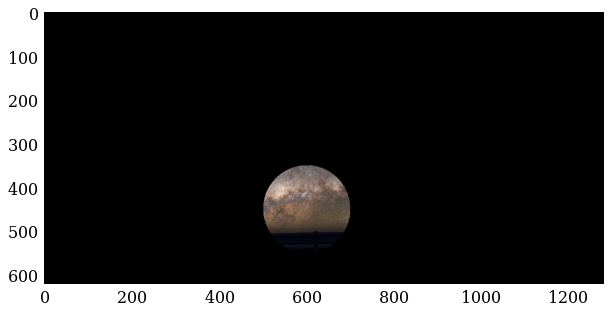

In [184]:
#Lets say I want to select part of the image in a circular area how would I do that?
#I guess I could pass a list of elements to the y and x coordinates to just grab the circle?

#lets center a circle on the MW roughly 425, 600

y_cen, x_cen = 600, 450
r_circ = 100

#find all integers within a circle of radius lets say 100 of this

#circle equation

#(x-x_cen)**2.0 + (y-y_cen)**2.0 = r**2.0

#now for a condition we have 

#(x-x_cen)**2.0 + (y-y_cen)**2.0 < r**2.0


print(index_x)

#circle_mask = ((index_x-x_cen)**2.0 + (index_y-y_cen)**2.0 < r_circ**2.0)
#

X, Y = np.ogrid[:im.shape[0],:im.shape[1]]
#print(X, Y)

distance_from_center = np.sqrt((X - x_cen)**2 + (Y - y_cen)**2)

circle_mask = (distance_from_center<r_circ)
print(np.sum(circle_mask))

#index_x_masked = index_x[circle_mask]
#index_y_masked = index_y[circle_mask]

#print(circle_mask.shape,im.shape)

im_circ = im.copy()

im_circ[~circle_mask] = 0

#print(im_circ)

plt.figure(1,(10,10))
plt.imshow(im_circ)
plt.show()

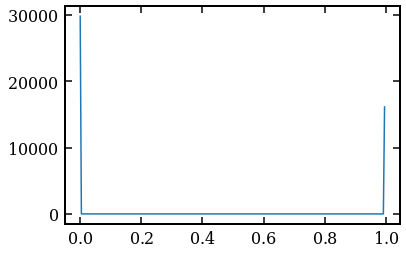

In [168]:
hist, bin_edge = np.histogram(im,bins=256,range=(0,1))
plt.plot(bin_edge[0:-1],hist)
plt.show()

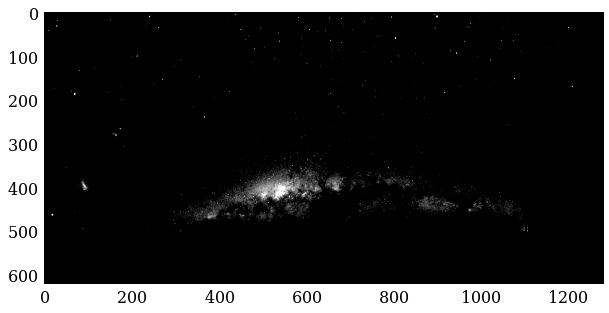

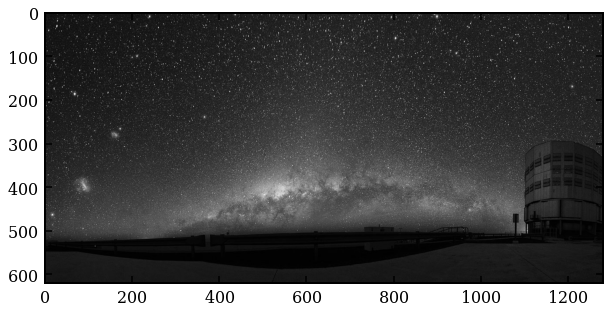

In [193]:
plt.figure(1,(10,10))
plt.imshow(im_grey,cmap=plt.cm.gray,vmin=100,vmax=200)
plt.show()

plt.figure(1,(10,10))
plt.imshow(im_grey,cmap=plt.cm.gray)
plt.show()

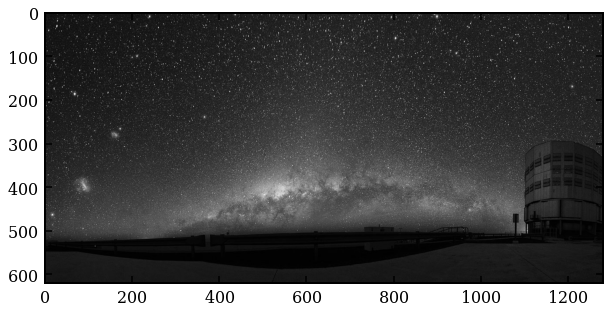

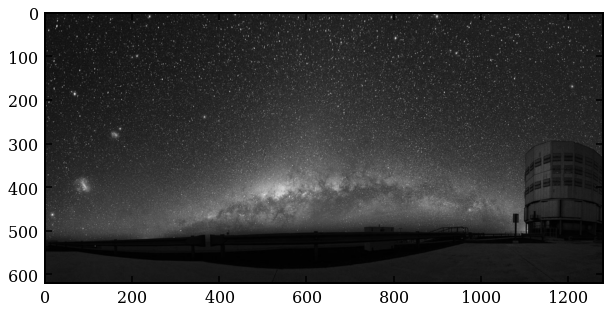

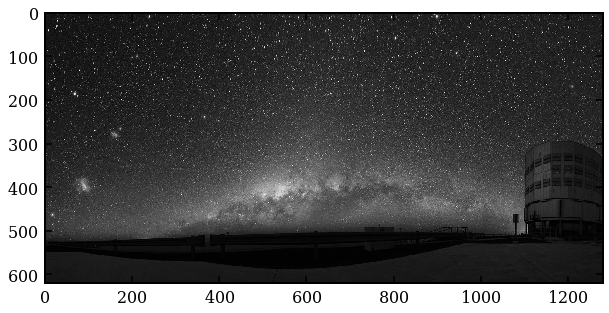

In [195]:
plt.figure(1,(10,10))
plt.imshow(im_grey,cmap=plt.cm.gray)
plt.show()

plt.figure(1,(10,10))
plt.imshow(im_grey,cmap=plt.cm.gray,interpolation='bilinear')
plt.show()

plt.figure(1,(10,10))
plt.imshow(im_grey,cmap=plt.cm.gray,interpolation='nearest')
plt.show()

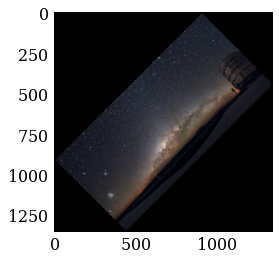

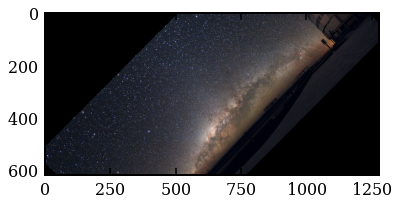

In [201]:
im_rot_45 = scipy.ndimage.rotate(im,45)

plt.imshow(im_rot_45)
plt.show()

im_rot_45 = scipy.ndimage.rotate(im,45,reshape=False)

plt.imshow(im_rot_45)
plt.show()

30.71710108014036


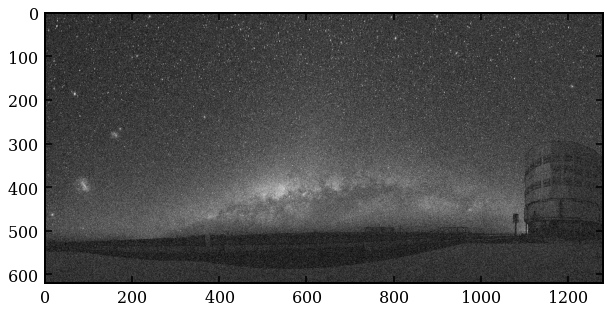

In [213]:
#Lets make a noisy image

print(np.std(im_grey))

im_grey_noise = im_grey + 3.0*np.std(im_grey)*np.random.random(im_grey.shape)

plt.figure(1,(10,10))
plt.imshow(im_grey_noise,cmap=plt.cm.gray)
plt.show()

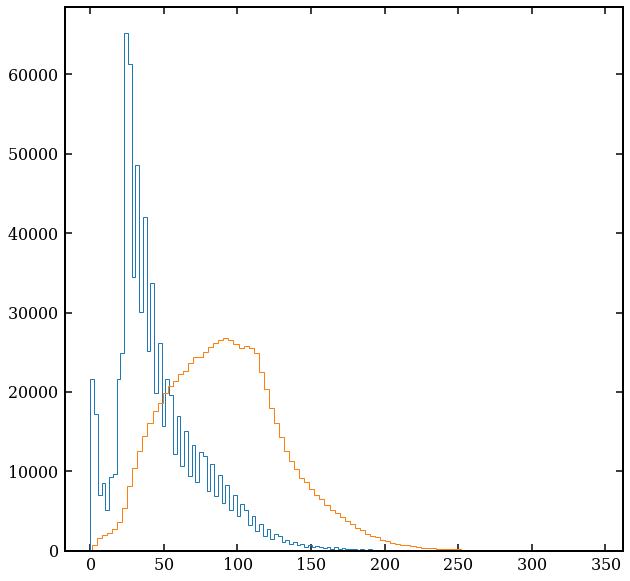

In [217]:
plt.figure(1,(10,10))
plt.hist(np.ndarray.flatten(im_grey),bins=100,histtype='step')
plt.hist(np.ndarray.flatten(im_grey_noise),bins=100,histtype='step')
plt.show()

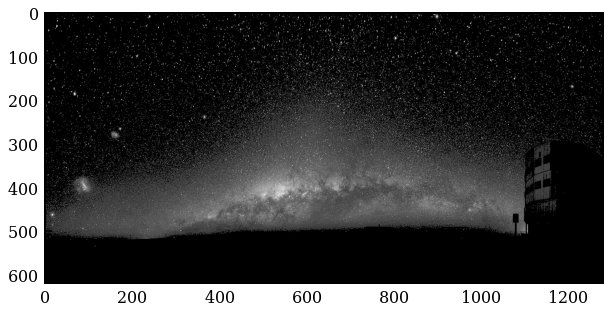

In [219]:
im_grey_just_bright = im_grey.copy()

im_grey_just_bright[im_grey_just_bright<50]=0

plt.figure(1,(10,10))
plt.imshow(im_grey_just_bright,cmap=plt.cm.gray)
plt.show()

In [226]:
n = 10
l = 256
im_synth = np.zeros((l, l))
points = l*np.random.random((2, n**2))
im_synth[(points[0]).astype(int), (points[1]).astype(int)] = 1
im_synth = scipy.ndimage.gaussian_filter(im_synth, sigma=l/(4.*n))
mask = im_synth > im_synth.mean()

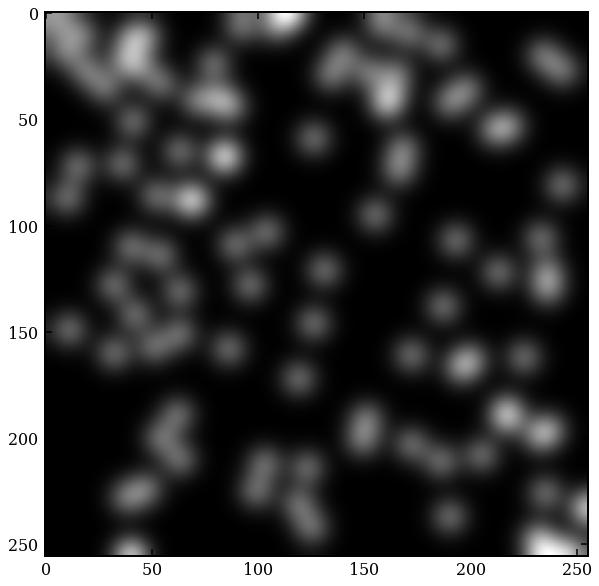

In [227]:
plt.figure(1,(10,10))
plt.imshow(im_synth,cmap=plt.cm.gray)
plt.show()

25
(256, 256)


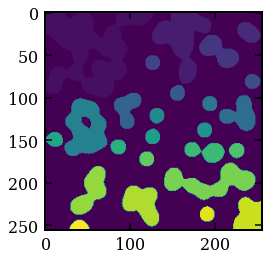

In [233]:
label_im_synth, nb_labels = scipy.ndimage.label(mask)

print(nb_labels) # how many regions?
print(label_im_synth.shape)
plt.imshow(label_im_synth)

In [234]:
print(mask)

[[ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 ...
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]]


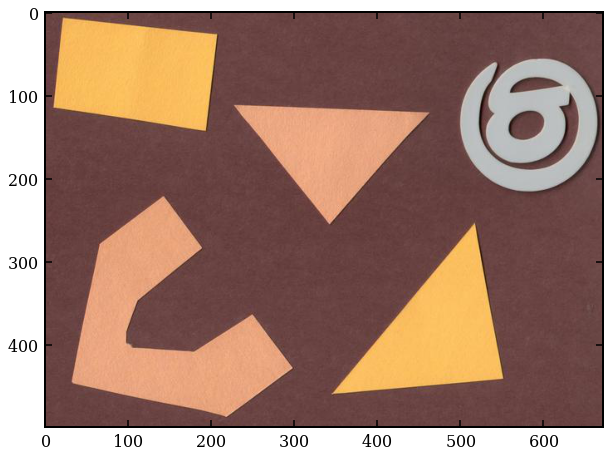

In [235]:
#Thresholding practice
im_thresh = np.array(Image.open('./06-more-junk.jpeg'))

plt.figure(1,(10,10))
plt.imshow(im_thresh)
plt.show()

(499, 672, 3)
(499, 672)


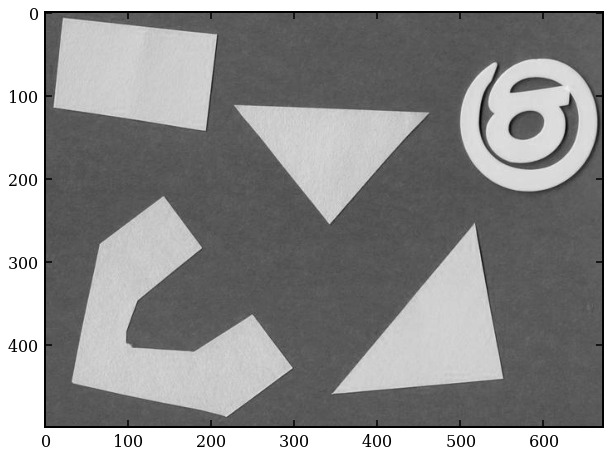

In [237]:
im_thresh_gray = np.mean(im_thresh,axis=2)
print(im_thresh.shape)
print(im_thresh_gray.shape)

plt.figure(1,(10,10))
plt.imshow(im_thresh_gray,cmap=plt.cm.gray)
plt.show()

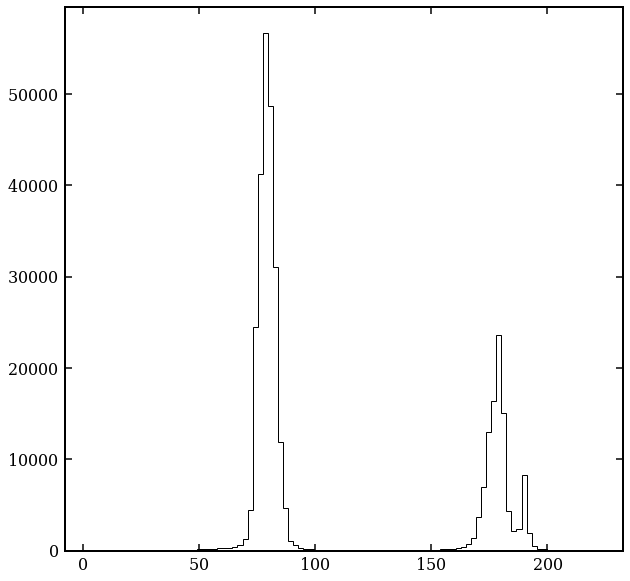

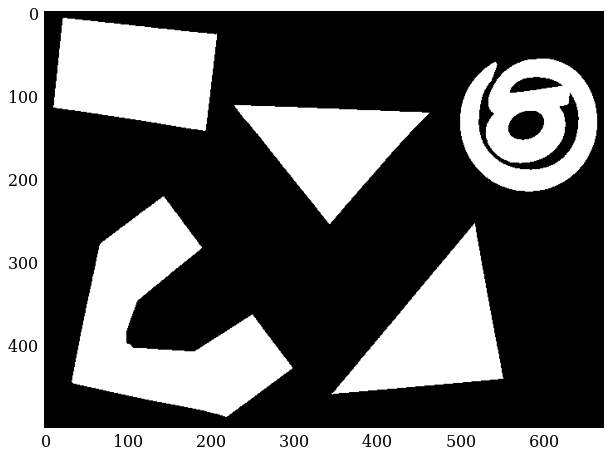

In [244]:
#Now draw a histogram of this gray-scaled data

plt.figure(1,(10,10))
plt.hist(np.ndarray.flatten(im_thresh_gray),bins=100,histtype='step',color='k')
plt.show()

threshold = 100

im_thresh_gray_masked = im_thresh_gray.copy()

im_thresh_gray_masked[(im_thresh_gray_masked<125)] = 0
im_thresh_gray_masked[(im_thresh_gray_masked>125)] = 255

plt.figure(1,(10,10))
plt.imshow(im_thresh_gray_masked,cmap=plt.cm.gray)
plt.show()

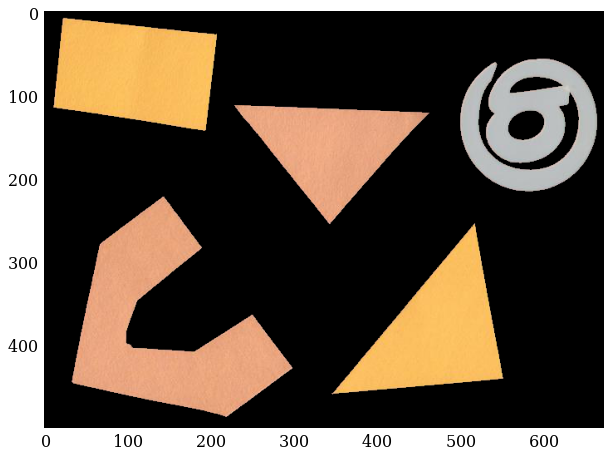

In [245]:
#I think I can just merge three identical masks to mask out the color values

RGB_mask = np.dstack([(im_thresh_gray_masked<125),
                      (im_thresh_gray_masked<125),
                      (im_thresh_gray_masked<125)])

RGB_masked = im_thresh.copy()

RGB_masked[RGB_mask] = 0

plt.figure(1,(10,10))
plt.imshow(RGB_masked)
plt.show()

In [246]:
10**3.5/10**3.2

1.995262314968879

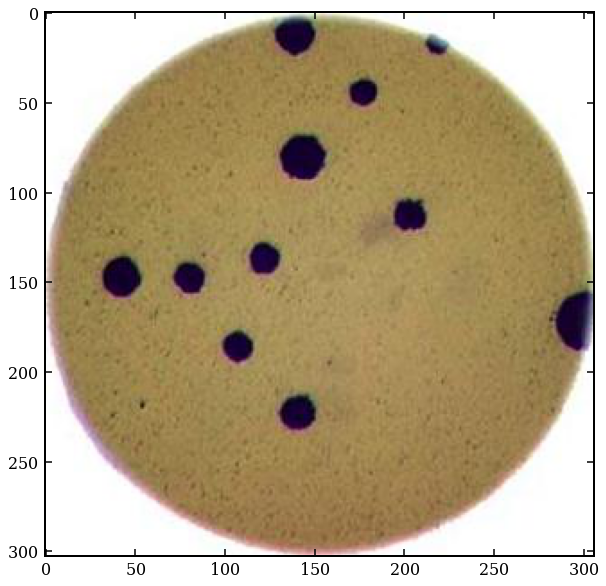

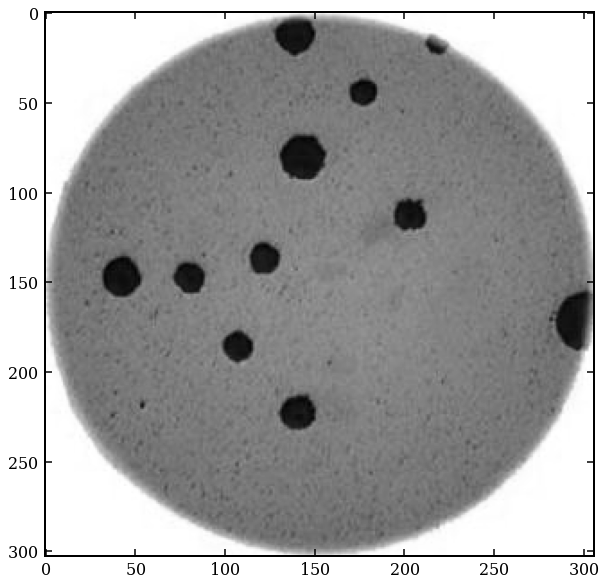

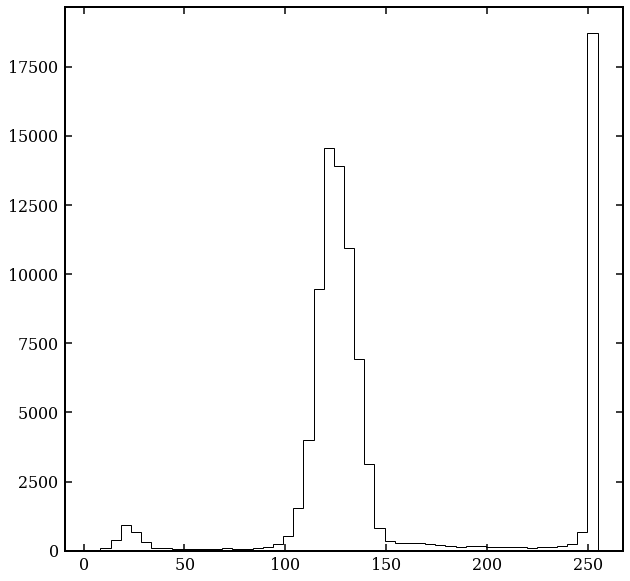

In [262]:
im_bact = np.array(Image.open('./00-colonies01.jpeg'))

plt.figure(1,(10,10))
plt.imshow(im_bact)
plt.show()

im_bact_grey = np.mean(im_bact,axis=2)

plt.figure(1,(10,10))
plt.imshow(im_bact_grey,cmap=plt.cm.gray)
plt.show()

plt.figure(1,(10,10))
plt.hist(np.ndarray.flatten(im_bact_grey),bins=50,histtype='step',color='k')
plt.show()

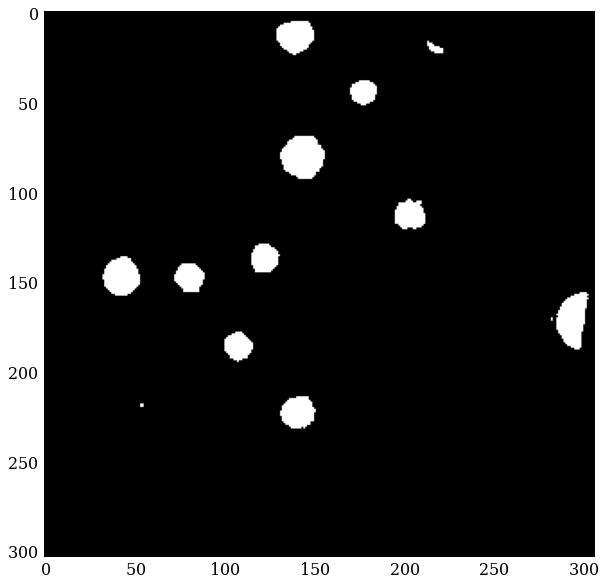

2814


In [279]:
#I think the bacteria are the smallest bump, the highest near white is the edges outside 
#the dish and the stuff in the middle is the yellowish background

im_bact_thresh = im_bact_grey.copy()

im_bact_thresh[im_bact_grey>50] = 0
im_bact_thresh[im_bact_grey<50] = 255

plt.figure(1,(10,10))
plt.imshow(im_bact_thresh,cmap=plt.cm.gray)
plt.show()

print(np.sum(im_bact_thresh==255))

In [285]:
im_list = ['./00-colonies01.jpeg','./00-colonies02.jpeg','./00-colonies03.jpeg']

for image_loc in im_list:
    im_bact = np.array(Image.open(image_loc))

    im_bact_grey = np.mean(im_bact,axis=2) #Grayscale it

    #I'm going to assume they all have the same threshold
    #plt.figure(1,(10,10))
    #plt.hist(np.ndarray.flatten(im_bact_grey),bins=50,histtype='step',color='k')
    #plt.show()
    
    im_bact_thresh = im_bact_grey.copy() #copy it so I can mask it

    im_bact_thresh[im_bact_grey>50] = 0
    im_bact_thresh[im_bact_grey<50] = 255

    #plt.figure(1,(10,10))
    #plt.imshow(im_bact_thresh,cmap=plt.cm.gray)
    #plt.show()

    print('for file: {}: number of bacteria pixels is: {}'.format(image_loc,np.sum(im_bact_thresh==255)))

for file: ./00-colonies01.jpeg: number of bacteria pixels is: 2814
for file: ./00-colonies02.jpeg: number of bacteria pixels is: 2545
for file: ./00-colonies03.jpeg: number of bacteria pixels is: 8251


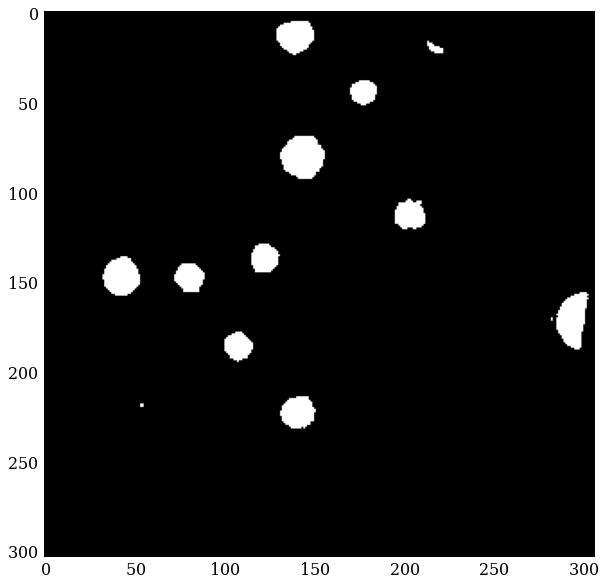

for file: ./00-colonies03.jpeg: number of bacteria pixels is: 2814
number of bact: 13


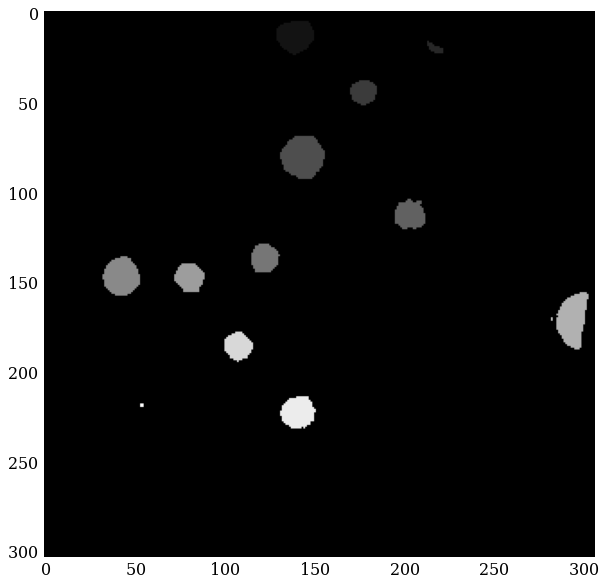

In [288]:
im_bact = np.array(Image.open('./00-colonies01.jpeg'))

im_bact_grey = np.mean(im_bact,axis=2) #Grayscale it

#I'm going to assume they all have the same threshold
#plt.figure(1,(10,10))
#plt.hist(np.ndarray.flatten(im_bact_grey),bins=50,histtype='step',color='k')
#plt.show()

im_bact_thresh = im_bact_grey.copy() #copy it so I can mask it

im_bact_thresh[im_bact_grey>50] = 0
im_bact_thresh[im_bact_grey<50] = 255

plt.figure(1,(10,10))
plt.imshow(im_bact_thresh,cmap=plt.cm.gray)
plt.show()

label, features = scipy.ndimage.measurements.label(im_bact_thresh)

print('for file: {}: number of bacteria pixels is: {}'.format(image_loc,np.sum(im_bact_thresh==255)))
print('number of bact: {}'.format(features))


plt.figure(1,(10,10))
plt.imshow(label,cmap=plt.cm.gray)
plt.show()

size of 0 is 89900 pixels
size of 1 is 304 pixels
size of 2 is 34 pixels
size of 3 is 163 pixels
size of 4 is 461 pixels
size of 5 is 228 pixels
size of 6 is 203 pixels
size of 7 is 348 pixels
size of 8 is 210 pixels
size of 9 is 394 pixels
size of 10 is 2 pixels
size of 11 is 193 pixels
size of 12 is 274 pixels
size of 13 is 4 pixels


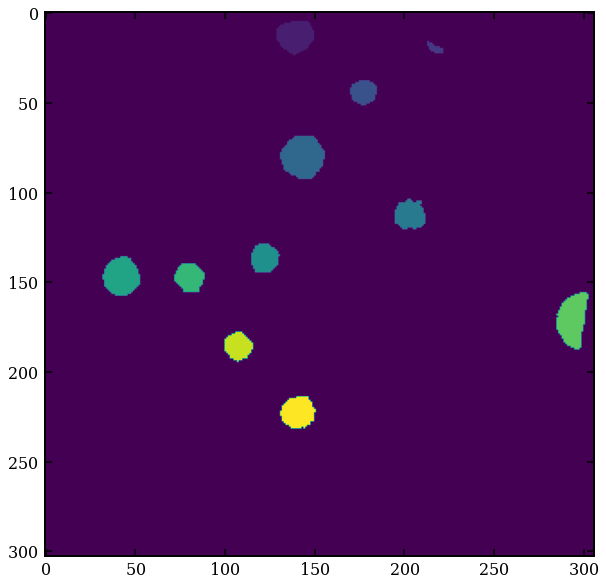

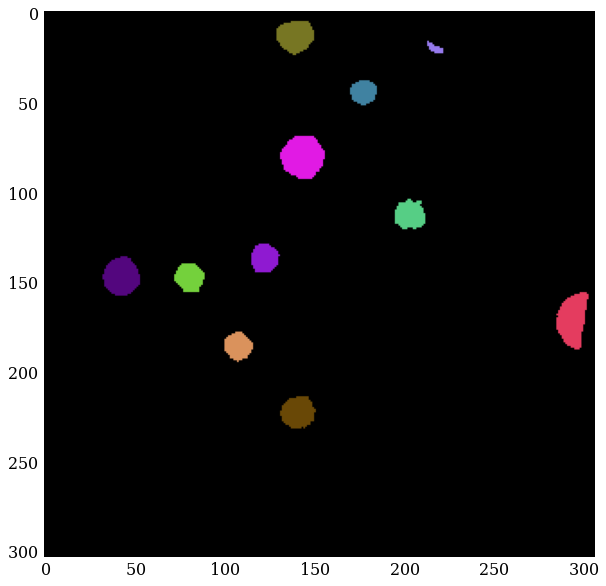

In [309]:
label_values = np.unique(label)
label_remove = label.copy()

label_remove_color = np.dstack((label_remove,label_remove,label_remove))

for ii in label_values:
    np.sum(label==ii)
    print('size of {} is {} pixels'.format(ii,np.sum(label==ii)))
    if np.sum(label==ii)<34:
        label_remove[label==ii] = 0
        label_remove_color[label==ii] = 0
        
    elif ii!=0:
        label_remove_color[label==ii] = [np.random.randint(255),np.random.randint(255),np.random.randint(255)]
    
        
plt.figure(1,(10,10))
plt.imshow(label_remove)
plt.show()

plt.figure(1,(10,10))
plt.imshow(label_remove_color)
plt.show()

In [307]:
np.random.randint(255)

183

In [ ]:
#if they have me do some video stuff you can open a video with:
import cv2

cap = cv2.VideoCapture('test.mp4')
frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

buf = np.empty((frameCount, frameHeight, frameWidth, 3), np.dtype('uint8'))

fc = 0
ret = True

while (fc < frameCount  and ret):
    ret, buf[fc] = cap.read()
    fc += 1

cap.release()

cv2.namedWindow('frame 10')
cv2.imshow('frame 10', buf[9])

cv2.waitKey(0)

#Alternatively I can use ffmpeg to split it into frames with
#ffmpeg -i "video.mov" -f image2 "video-frame%05d.png"